In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as stats

beta_dist = stats.beta

animal_choices = ['rabbit', 'chicken', 'piglet']
# 数量
num_animals = 200
# 概率
true_prob = [0.3, 0.6, 0.1]
# 生成数据
animal_array = np.random.choice(animal_choices, num_animals, p=true_prob)
# 在最开始插入 0 值
animal_array = np.insert(animal_array, 0, 0)
# 转换为Pandas DataFrame
animal_df = pd.DataFrame(data=animal_array, columns=['Animal'])

# 添加新的列
animal_df['x1_chicken'] = 0
animal_df['x2_rabbit'] = 0
animal_df['x3_piglet'] = 0

animal_df.loc[animal_df['Animal'] == 'chicken', 'x1_chicken'] = 1
animal_df.loc[animal_df['Animal'] == 'rabbit', 'x2_rabbit'] = 1
animal_df.loc[animal_df['Animal'] == 'piglet', 'x3_piglet'] = 1

animal_df.loc[animal_df['Animal'] == 'chicken', 'x1_plot'] = 0
animal_df.loc[animal_df['Animal'] == 'rabbit', 'x2_plot'] = 1
animal_df.loc[animal_df['Animal'] == 'piglet', 'x3_plot'] = 2

animal_df['x1_cumsum'] = animal_df['x1_chicken'].cumsum()
animal_df['x2_cumsum'] = animal_df['x2_rabbit'].cumsum()
animal_df['x3_cumsum'] = animal_df['x3_piglet'].cumsum()
animal_df['total_plot'] = animal_df[["x1_plot", "x2_plot", "x3_plot"]].sum(axis=1)

animal_df['total'] = animal_df['x1_cumsum'] + animal_df['x2_cumsum'] + animal_df['x3_cumsum']

animal_df['x1_ratio'] = animal_df['x1_cumsum'] / animal_df['total']
animal_df['x2_ratio'] = animal_df['x2_cumsum'] / animal_df['total']
animal_df['x3_ratio'] = animal_df['x3_cumsum'] / animal_df['total']

animal_df[['x1_ratio', 'x2_ratio', 'x3_ratio']] = animal_df[['x1_ratio', 'x2_ratio', 'x3_ratio']].bfill()
# bfill() 方法会将每个缺失值替换为其所在列中下一个非缺失值 为了解决第一列为 NAN 
animal_df

,Animal,x1_chicken,x2_rabbit,x3_piglet,x1_plot,x2_plot,x3_plot,x1_cumsum,x2_cumsum,x3_cumsum,total_plot,total,x1_ratio,x2_ratio,x3_ratio
0,0,0,0,0,NaN,NaN,NaN,0,0,0,0.0,0,1.000000,0.000000,0.000000
1,chicken,1,0,0,0.0,NaN,NaN,1,0,0,0.0,1,1.000000,0.000000,0.000000
2,piglet,0,0,1,NaN,NaN,2.0,1,0,1,2.0,2,0.500000,0.000000,0.500000
3,chicken,1,0,0,0.0,NaN,NaN,2,0,1,0.0,3,0.666667,0.000000,0.333333
4,rabbit,0,1,0,NaN,1.0,NaN,2,1,1,1.0,4,0.500000,0.250000,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,chicken,1,0,0,0.0,NaN,NaN,119,59,18,0.0,196,0.607143,0.301020,0.091837
197,rabbit,0,1,0,NaN,1.0,NaN,119,60,18,1.0,197,0.604061,0.304569,0.091371
198,rabbit,0,1,0,NaN,1.0,NaN,119,61,18,1.0,198,0.601010,0.308081,0.090909
199,rabbit,0,1,0,NaN,1.0,NaN,119,62,18,1.0,199,0.597990,0.311558,0.090452


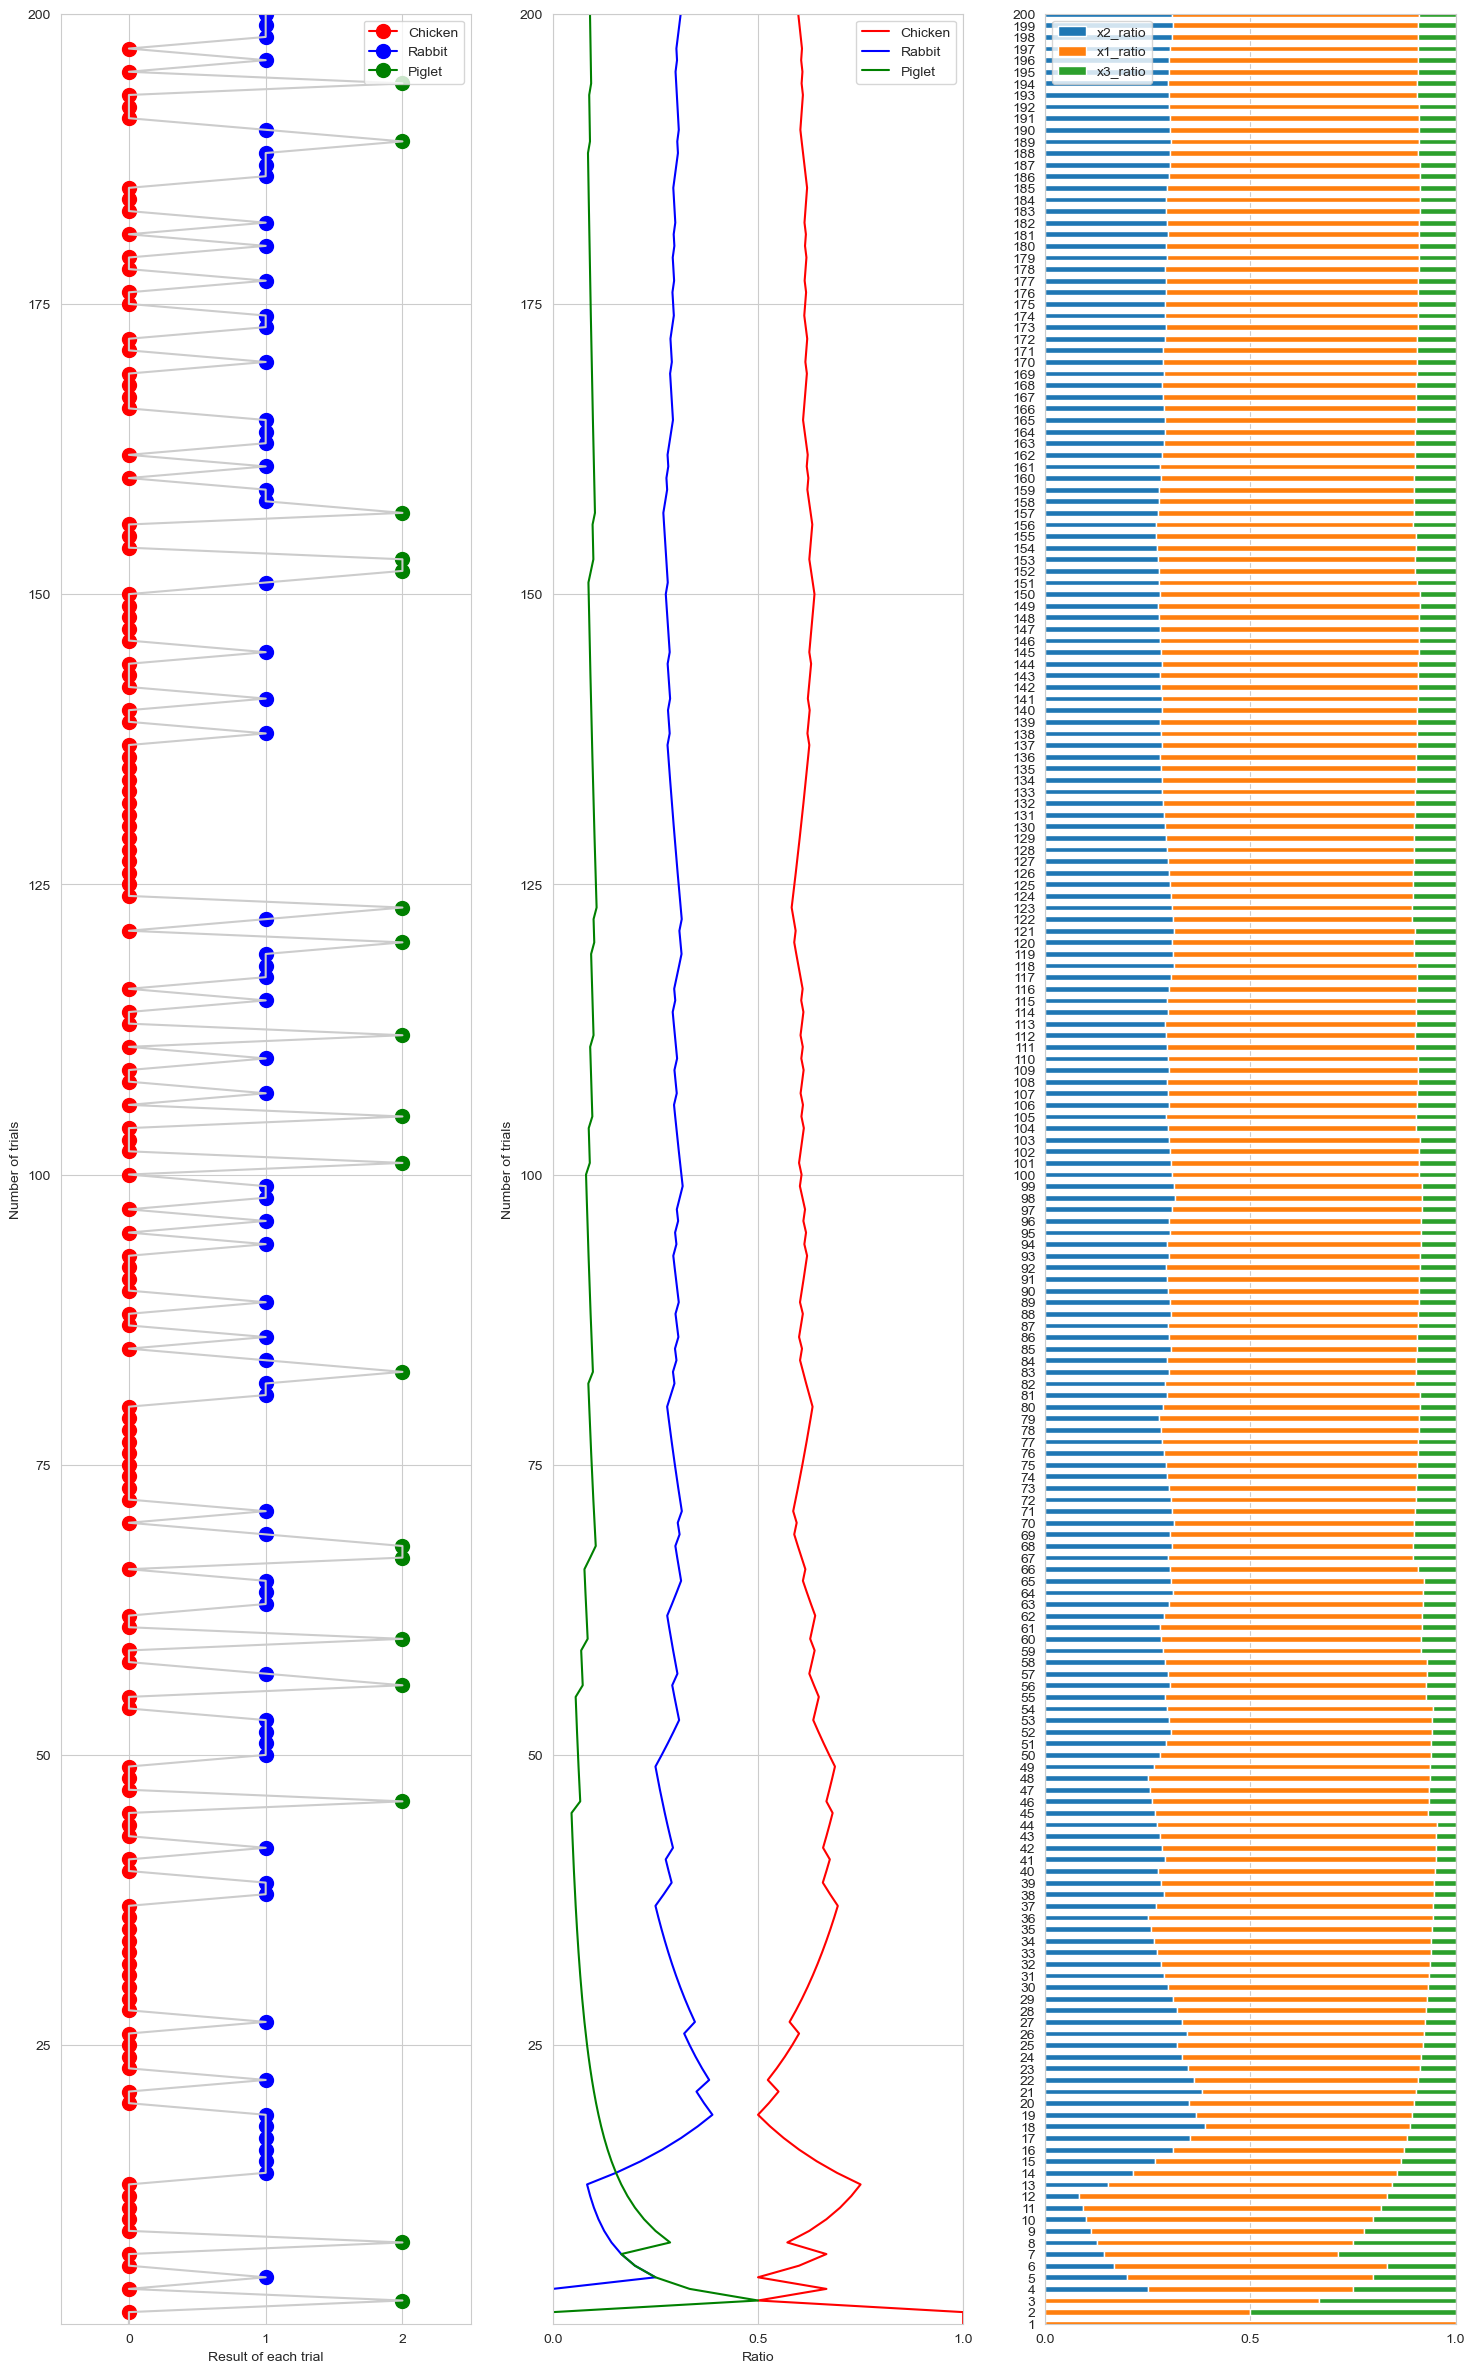

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 30))

trials_array = np.arange(0, 201) + 1

axs[0].plot(animal_df['x1_plot'], trials_array,
            color='r', linestyle=None,
            marker='.', markersize=20,
            label='Chicken')

axs[0].plot(animal_df['x2_plot'], trials_array,
            color='b', linestyle=None,
            marker='.', markersize=20,
            label='Rabbit')

axs[0].plot(animal_df['x3_plot'], trials_array,
            color='g', linestyle=None,
            marker='.', markersize=20,
            label='Piglet')

axs[0].plot(animal_df['total_plot'],
            trials_array,
            color=[0.8, 0.8, 0.8])

axs[0].set_ylim(1, 200)
axs[0].set_xlim(-0.5, 2.5)
axs[0].set_xticks([0, 1, 2])

axs[0].set_ylabel("Number of trials", rotation=90)
# axs[0].yaxis.tick_right()
# axs[0].yaxis.set_label_position("right")
axs[0].set_xlabel("Result of each trial")
# axs[0].invert_xaxis()
axs[0].legend()

axs[1].plot(animal_df['x1_ratio'], trials_array,
            color='r', label='Chicken')

axs[1].plot(animal_df['x2_ratio'], trials_array,
            color='b', label='Rabbit')

axs[1].plot(animal_df['x3_ratio'], trials_array,
            color='g', label='Piglet')

axs[1].set_ylim(1, 200)
axs[1].set_xlim(0, 1)
axs[1].set_xticks([0, 0.5, 1])

axs[1].set_ylabel("Number of trials", rotation=90)
# axs[1].yaxis.tick_right()
# axs[1].yaxis.set_label_position("right")
axs[1].set_xlabel("Ratio")
# axs[1].invert_xaxis()
axs[1].legend()

animal_df[['x2_ratio', 'x1_ratio', 'x3_ratio']].plot.barh(stacked=True, ax=axs[2])

axs[2].set_ylim(1, 200)
axs[2].set_xlim(0, 1)
axs[2].set_xticks([0, 0.5, 1])


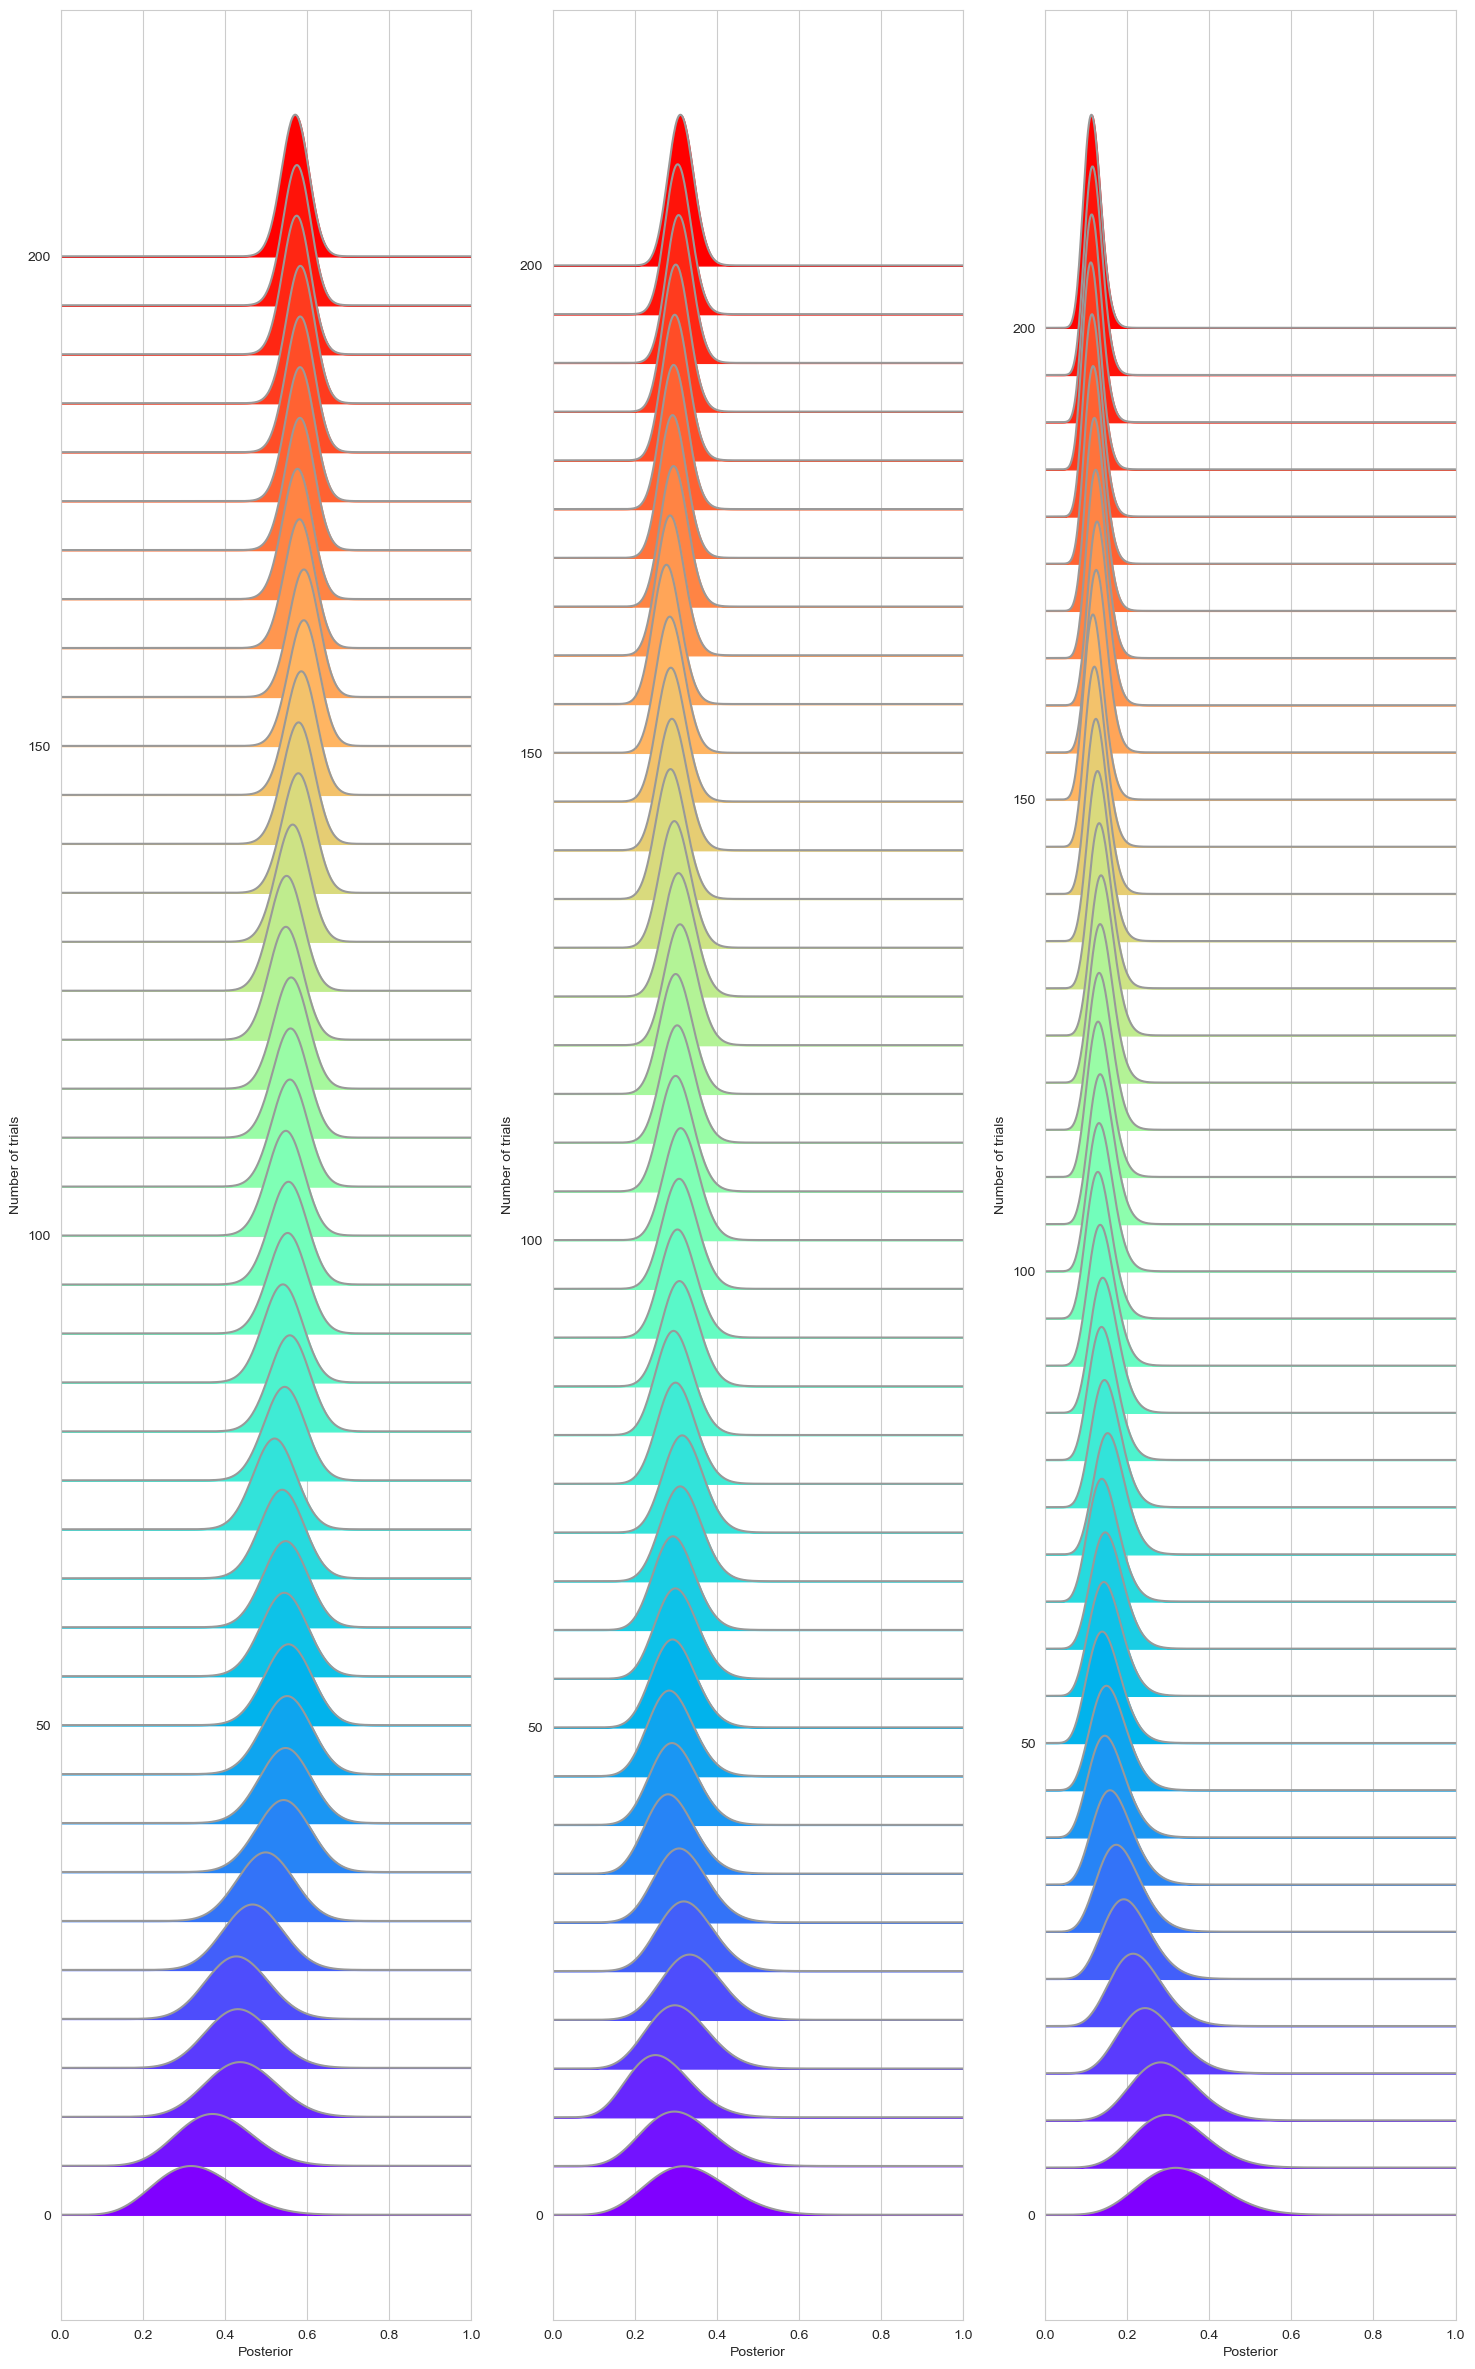

In [12]:
alpha_1 = 8  # 1, 2
alpha_2 = 8  # 1, 2
alpha_3 = 8  # 1, 2

alpha_0 = alpha_1 + alpha_2 + alpha_3

# ridgeline style

from matplotlib.pyplot import cm

# 参数值
theta_array = np.linspace(0, 1, 500)
# 动物数量
num_animals_array = np.arange(0, 200 + 5, 5)
# reverse the sequence of layers
num_animals_array = num_animals_array[::-1]

# 颜色映射
colors = cm.rainbow_r(np.linspace(0, 1, len(num_animals_array)))
theta_array = np.linspace(0, 1, 500)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 30))

alphas = [alpha_1, alpha_2, alpha_3]
x_3_choices = ['x1_cumsum', 'x2_cumsum', 'x3_cumsum']

for ax_idx, alpha_prior_idx, x_idx in zip(axs.ravel(), alphas, x_3_choices):

    for idx, num_animals_idx in enumerate(num_animals_array):
        
        # 每一层的高度
        height = num_animals_idx
        # random data generator
        # 每一层的数据
        num_chickens_idx = animal_df.iloc[num_animals_idx][x_idx]

        # Selected animal
        # 参数
        alpha_idx = alpha_prior_idx + num_chickens_idx
        beta_idx = alpha_0 + num_animals_idx - alpha_idx
        posterior_pdf = beta_dist.pdf(
            theta_array,
            alpha_idx,
            beta_idx)

        loc_max_1 = theta_array[np.argmax(posterior_pdf)]
        # location of MAP

        ratio = 1.2
        ax_idx.plot(theta_array,
                    posterior_pdf * ratio + height,
                    color=[0.6, 0.6, 0.6])

        ax_idx.fill_between(theta_array, height,
                            posterior_pdf * ratio + height,
                            color=colors[idx])

    ax_idx.set_xlim(0, 1)
    ax_idx.set_xlabel('Posterior')
    ax_idx.set_ylabel('Number of trials')


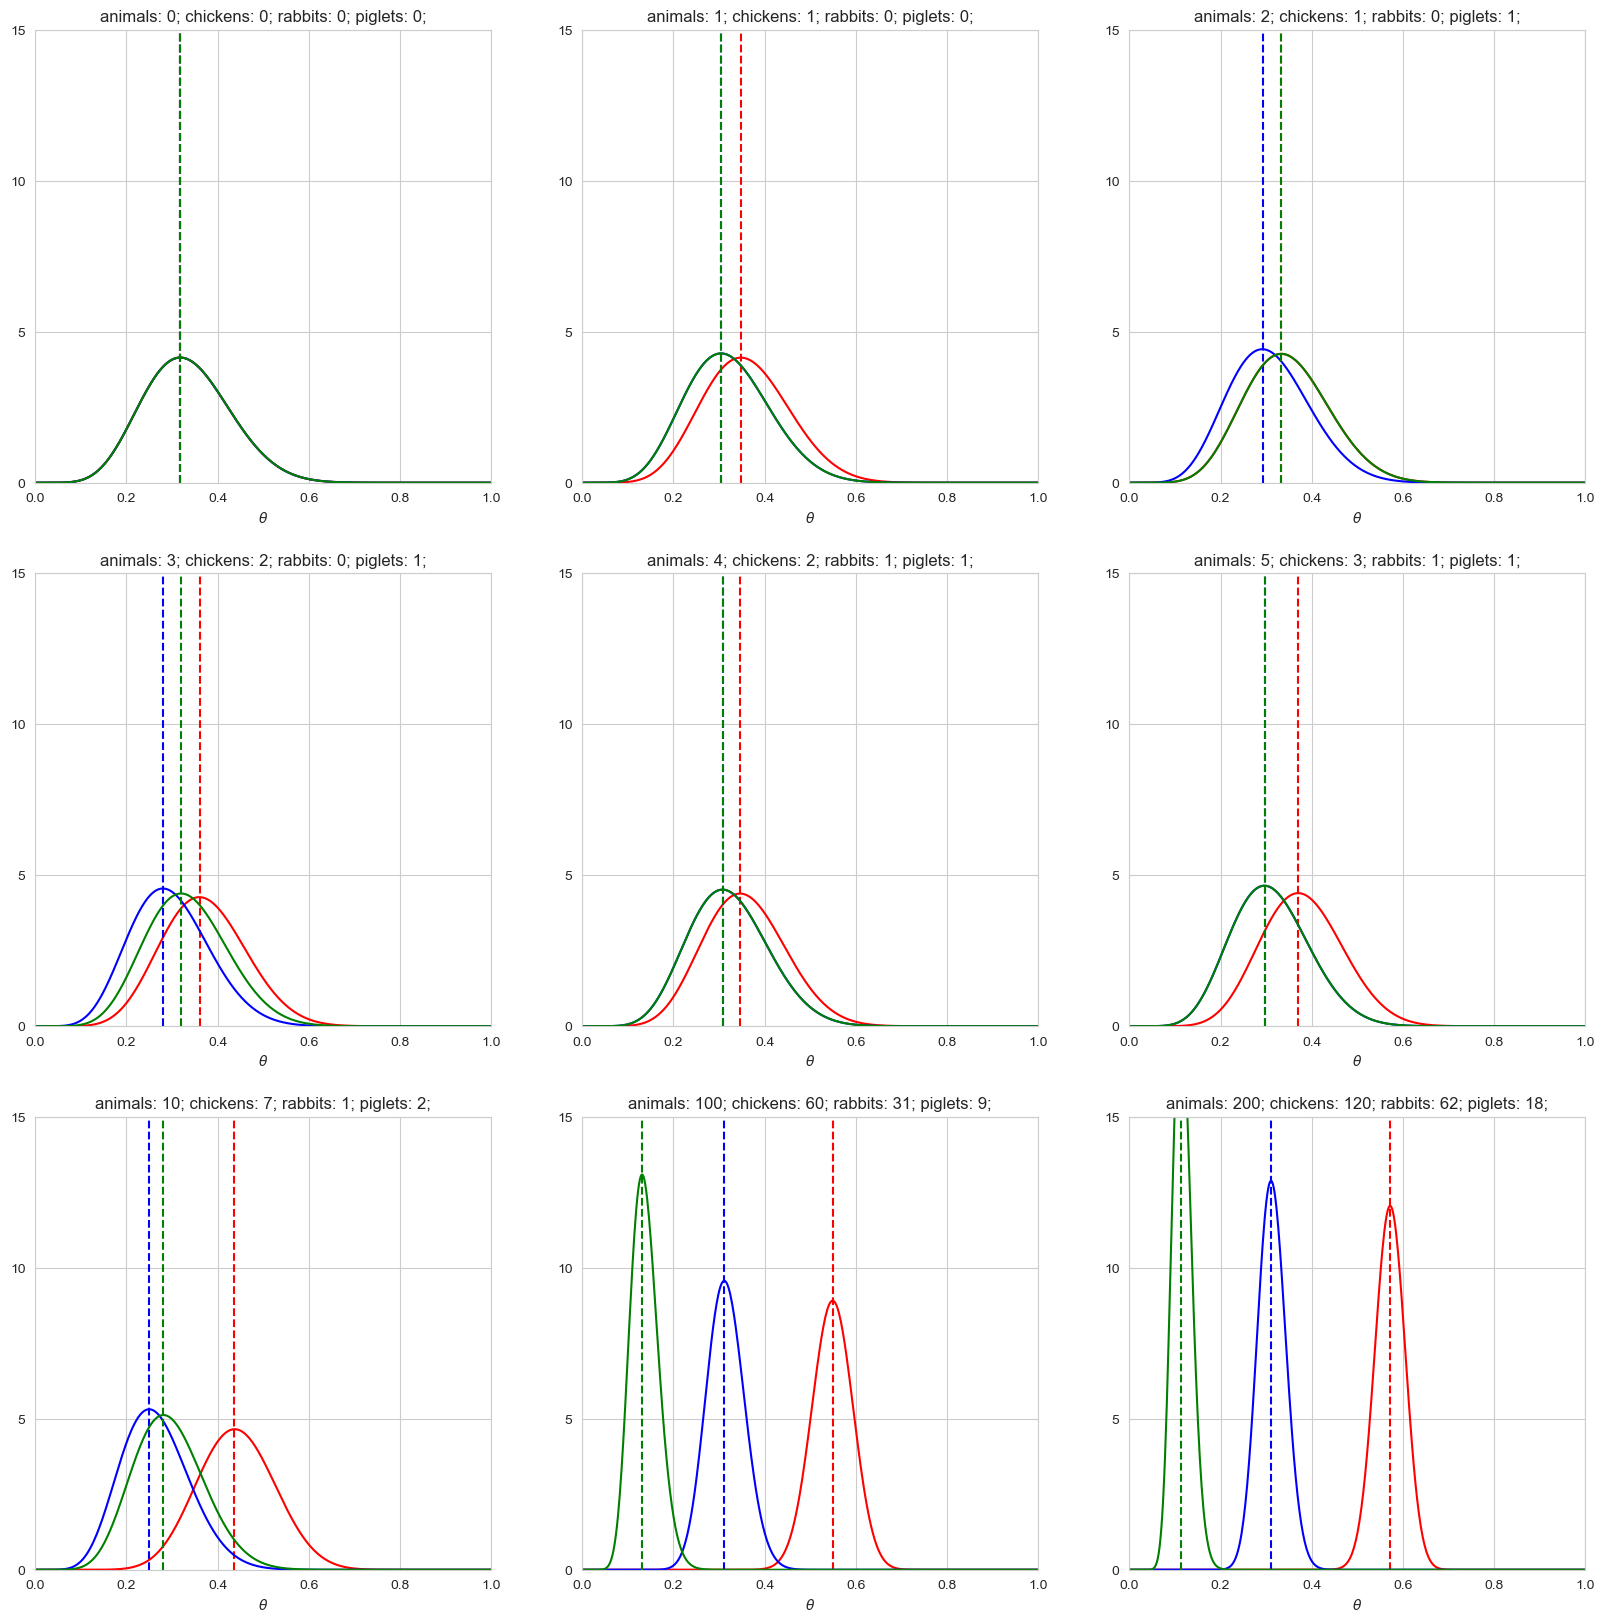

In [14]:
# locations of snapshots

num_animals_array = [0, 1, 2, 3, 4, 5, 10, 100, 200]

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))

for ax_idx, num_animals_idx in zip(axs.ravel(), num_animals_array):
    # can be replaced by a nested for loop
    # 总数
    num_chickens_idx = animal_df.iloc[num_animals_idx].x1_cumsum
    num_rabbits_idx = animal_df.iloc[num_animals_idx].x2_cumsum
    num_piglets_idx = animal_df.iloc[num_animals_idx].x3_cumsum

    # Chickens:
    alpha_1_idx = alpha_1 + num_chickens_idx
    beta_1_idx = alpha_0 + num_animals_idx - alpha_1_idx
    posterior_pdf_1 = beta_dist.pdf(
        theta_array,
        alpha_1_idx,
        beta_1_idx)

    loc_max_1 = theta_array[np.argmax(posterior_pdf_1)]
    # location of MAP, marginal Beta

    ax_idx.plot(theta_array, posterior_pdf_1, color='r')
    ax_idx.axvline(x=loc_max_1, color='r', linestyle='--')

    # rabbits
    alpha_2_idx = alpha_2 + num_rabbits_idx
    beta_2_idx = alpha_0 + num_animals_idx - alpha_2_idx
    posterior_pdf_2 = beta_dist.pdf(
        theta_array,
        alpha_2_idx,
        beta_2_idx)

    loc_max_2 = theta_array[np.argmax(posterior_pdf_2)]
    # location of MAP, marginal Beta

    ax_idx.plot(theta_array, posterior_pdf_2, color='b')
    ax_idx.axvline(x=loc_max_2, color='b', linestyle='--')

    # piglets
    alpha_3_idx = alpha_3 + num_piglets_idx
    beta_3_idx = alpha_0 + num_animals_idx - alpha_3_idx
    posterior_pdf_3 = beta_dist.pdf(
        theta_array,
        alpha_3_idx,
        beta_3_idx)

    loc_max_3 = theta_array[np.argmax(posterior_pdf_3)]
    # location of MAP, marginal Beta

    ax_idx.plot(theta_array, posterior_pdf_3, color='g')
    ax_idx.axvline(x=loc_max_3, color='g', linestyle='--')

    ax_idx.set_xlabel('$\u03B8$')
    ax_idx.set_xlim(0, 1)
    ax_idx.set_yticks([0, 5, 10, 15])
    ax_idx.set_ylim(0, 15)

    ax_idx.set_title("animals: %d; chickens: %d; rabbits: %d; piglets: %d;"
                     % (num_animals_idx, num_chickens_idx, num_rabbits_idx, num_piglets_idx))


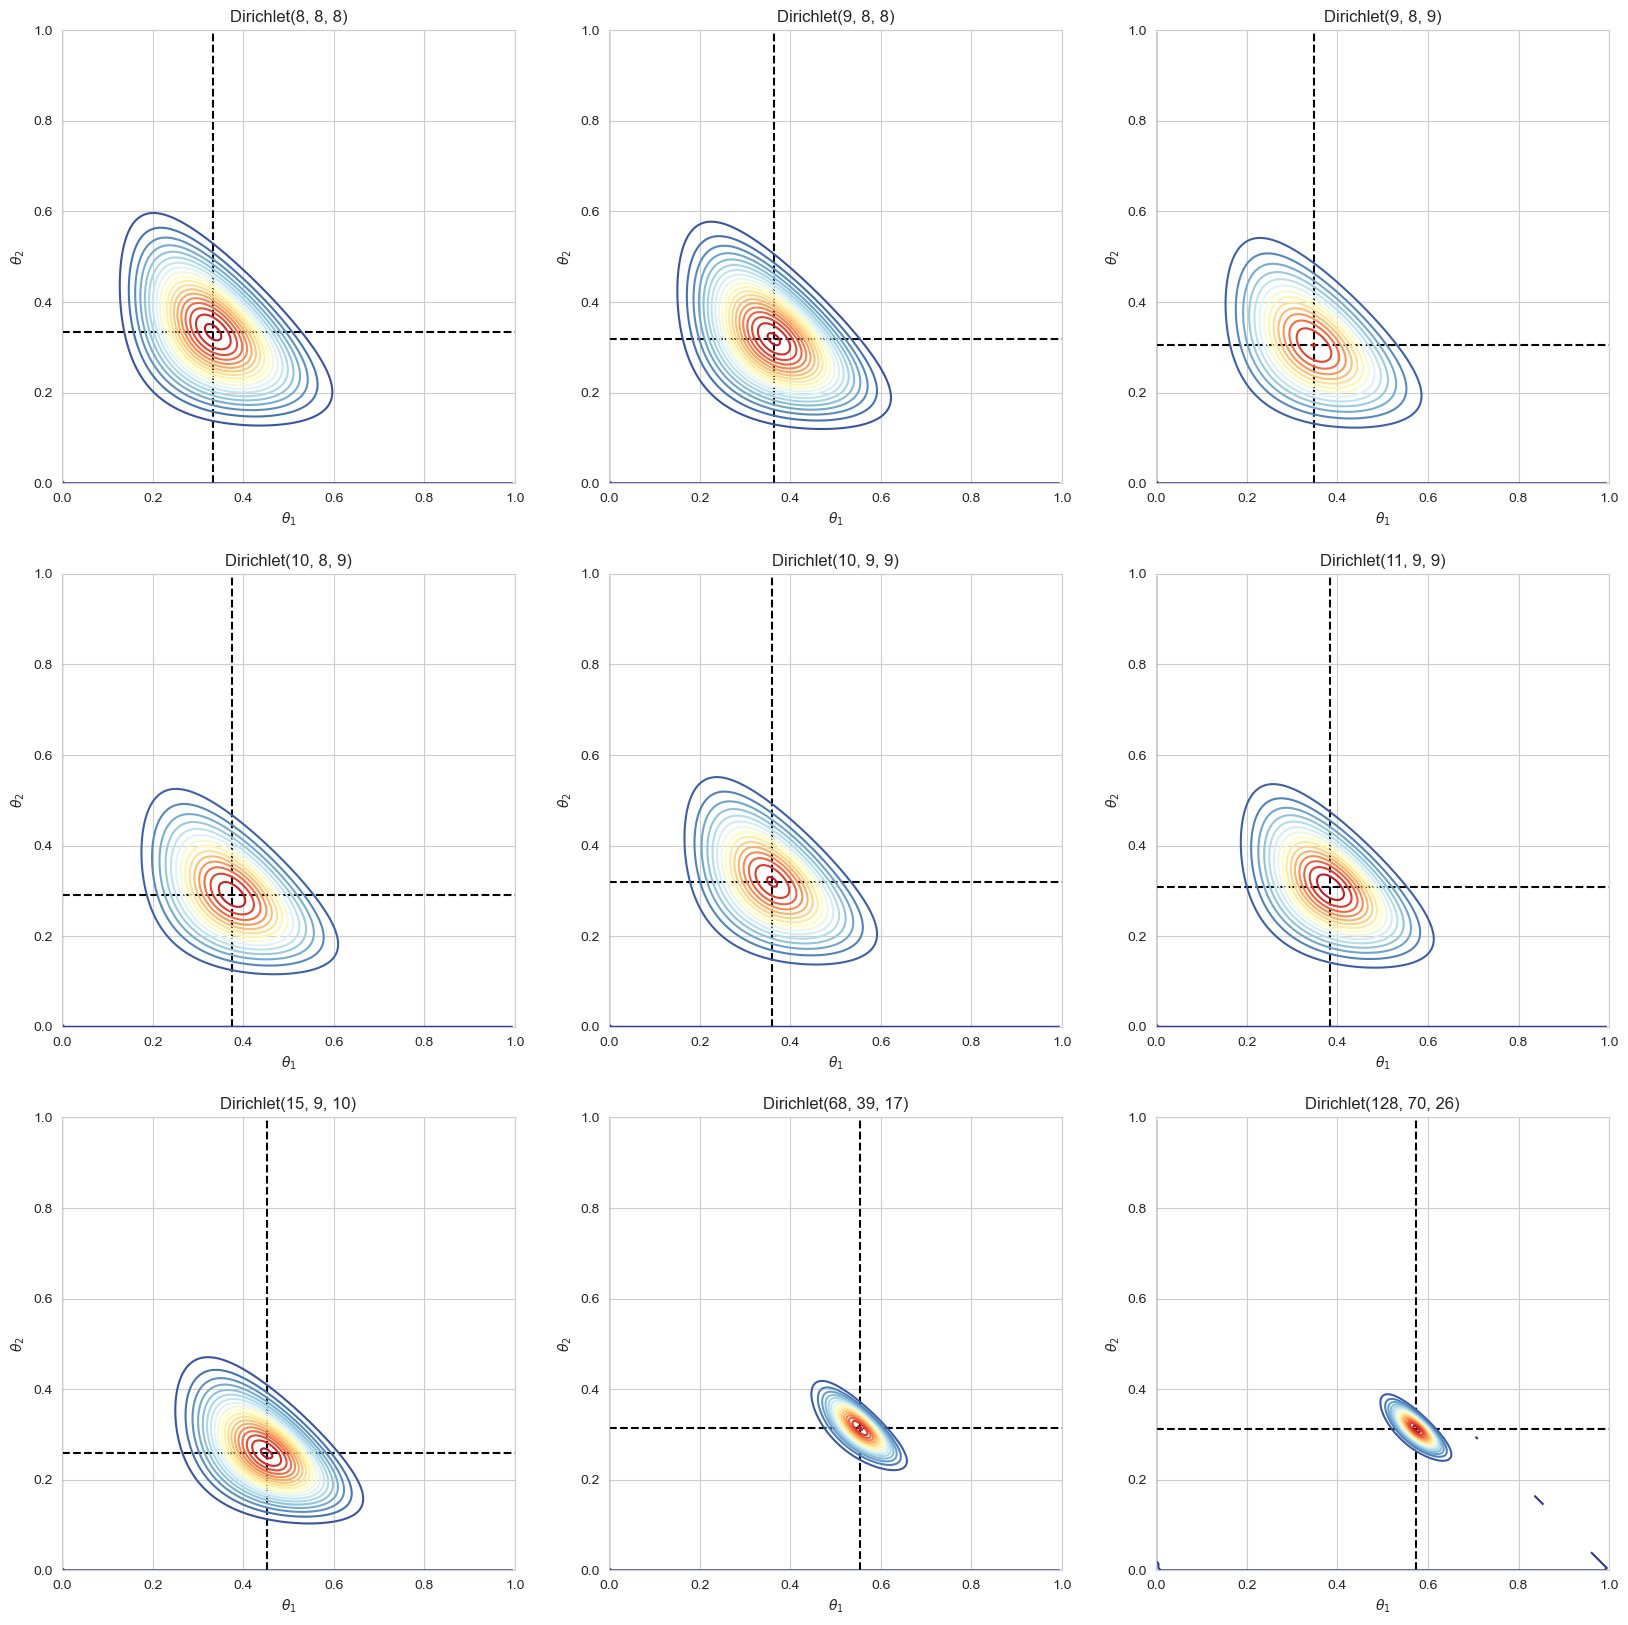

In [15]:
x1 = np.linspace(0, 1, 201)
x2 = np.linspace(0, 1, 201)

xx1, xx2 = np.meshgrid(x1, x2)

xx3 = 1.0 - xx1 - xx2
xx3 = np.where(xx3 > 0.0, xx3, np.nan)

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))

for ax_idx, num_animals_idx in zip(axs.ravel(), num_animals_array):
    # can be replaced by a nested for loop
    # 每个类别的数量
    num_chickens_idx = animal_df.iloc[num_animals_idx].x1_cumsum
    num_rabbits_idx = animal_df.iloc[num_animals_idx].x2_cumsum
    num_piglets_idx = animal_df.iloc[num_animals_idx].x3_cumsum
    # 总数
    n = animal_df.iloc[num_animals_idx].total

    # Dirichlet alphas
    alpha_1_idx = alpha_1 + num_chickens_idx
    alpha_2_idx = alpha_2 + num_rabbits_idx
    alpha_3_idx = alpha_3 + num_piglets_idx

    title_txt = 'Dirichlet(%0.0f, %0.0f, %0.0f)' % (alpha_1_idx, alpha_2_idx, alpha_3_idx)

    alphas = np.array([alpha_1_idx, alpha_2_idx, alpha_3_idx])
    # 创建 Dirichlet 对象
    rv = stats.dirichlet(alphas)
    PDF_ff = rv.pdf(np.array(([xx1.ravel(), xx2.ravel(), xx3.ravel()])))
    PDF_ff = np.reshape(PDF_ff, xx1.shape)
    
    # 最可能的值
    theta_1_mode = (alpha_1 + num_chickens_idx - 1) / (alpha_0 + n - 3)
    theta_2_mode = (alpha_2 + num_rabbits_idx - 1) / (alpha_0 + n - 3)

    ax_idx.axvline(x=theta_1_mode, color='k', ls='--')
    ax_idx.axhline(y=theta_2_mode, color='k', ls='--')

    ax_idx.contour(xx1, xx2, PDF_ff, 20, cmap='RdYlBu_r')
    ax_idx.set_xlabel(r'$\theta_1$')
    ax_idx.set_ylabel(r'$\theta_2$')
    ax_idx.set_box_aspect(1)
    ax_idx.set_title(title_txt)

